# **Connect to drive**


In [1]:
#Mount the drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Check image exist**

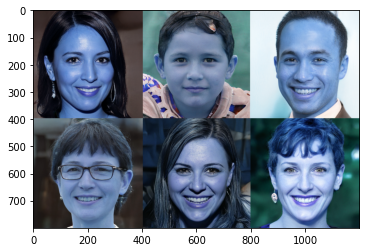

In [64]:
from os import path
import sys
import matplotlib.pyplot as plt
import cv2 as cv

picture_path='/content/drive/My Drive/DL_Final_Project/images/fake_ai_faces.0.png'
if not path.exists(picture_path):
  print("Failed to obtain img")
  sys.exit()
else:
  plt.imshow(cv.imread(picture_path))


### **OPENCV** - Haar Cascades Classifier

https://github.com/opencv/opencv/tree/master/data/haarcascades

duration : 0.6725120544433594 seconds


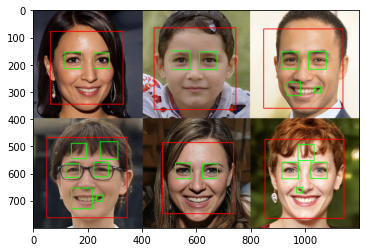

In [65]:
import cv2 as cv
import time
# Load Haar Cascade Classifier
path_to_config='/content/drive/My Drive/DL_Final_Project/opencv_xmls'
start_time = time.time()
face_cascade = cv.CascadeClassifier('{}/{}'.format(path_to_config,'haarcascade_frontalface_default.xml'))
eye_cascade = cv.CascadeClassifier('{}/{}'.format(path_to_config,'haarcascade_eye.xml'))
# Read the image
img = cv.imread(picture_path)
# Convert image to graysclae
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
print('duration : {} seconds'.format(time.time()-start_time))        



## **DLIB** - enable gpu (mandatory)

In [4]:
pip install face_recognition

Number of face(s) in this image 6.
duration : 0.6859257221221924 seconds


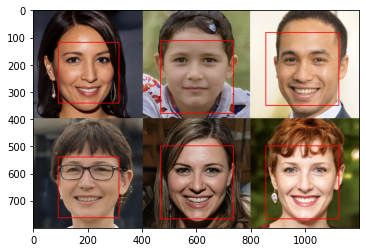

In [5]:
import face_recognition
import cv2 as cv
import time
start_time = time.time()
# Load the jpg file into a numpy array
image = cv.imread(picture_path)
# Find all the faces in the image
face_locations = face_recognition.face_locations(image)
# Get number of faces
number_of_faces = len(face_locations)
print("Number of face(s) in this image {}.".format(number_of_faces))
for face_location in face_locations:
    # Get coord
    x, y, z, w = face_location
    # Draw Face rectangle
    cv.rectangle(image,(w,x),(y,z),(0,0,255),2)
# Show image

plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
print('duration : {} seconds'.format(time.time()-start_time))   


## **YOLOface**

In [6]:
 import os
os.environ['PATH'] += ':/usr/local/cuda/bin'
 !rm -fr yoloface
 !git clone https://github.com/sthanhng/yoloface
 !chmod u+x /content/yoloface/yoloface.py
!pip install -r /content/yoloface/requirements.txt 
!pip install opencv-python==3.4.2.16

Cloning into 'yoloface'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 155 (delta 0), reused 1 (delta 0), pack-reused 152
Receiving objects: 100% (155/155), 1.40 MiB | 19.06 MiB/s, done.
Resolving deltas: 100% (59/59), done.
--2020-03-28 16:58:36--  https://drive.google.com/file/d/1xYasjU52whXMLT5MtF7RCPQkV66993oR/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 172.217.204.101, 172.217.204.139, 172.217.204.102, ...
Connecting to drive.google.com (drive.google.com)|172.217.204.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/content/yoloface/model-weights/view?usp=sharing’

view?usp=sharing        [ <=>                ]  67.41K  --.-KB/s    in 0.002s  

2020-03-28 16:58:36 (26.6 MB/s) - ‘/content/yoloface/model-weights/view?usp=sharing’ saved [69031]



In [0]:
!cp '/content/drive/My Drive/עבודת גמר/yolo_weights/yolov3-wider_16000.weights' '/content/yoloface/model-weights/'


In [63]:
start_time=time.time()
!python /content/yoloface/yoloface.py --image "$picture_path" --output-dir=/content/yoloface/outputs/ --model-cfg=/content/yoloface/cfg/yolov3-face.cfg --model-weights /content/yoloface/model-weights/yolov3-wider_16000.weights
print("duration: {} seconds".format(time.time()-start_time))

----- info -----
[i] The config file:  /content/yoloface/cfg/yolov3-face.cfg
[i] The weights of model file:  /content/yoloface/model-weights/yolov3-wider_16000.weights
[i] Path to image file:  /content/drive/My Drive/עבודת גמר/images/fake_ai_faces.0.png
[i] Path to video file:  
###########################################################

==> Skipping create the /content/yoloface/outputs/ directory...
test
[i] ==> # detected faces: 6
############################################################
[i] ==> Done processing!!!
[i] ==> Output file is stored at /content/yoloface/outputs/fake_ai_faces.0_yoloface.jpg
==> All done!
***********************************************************
duration: 4.507413387298584 seconds


In [34]:
!xvfb-run --help

/bin/bash: xvfb-run: command not found


## **faced - near real time face detector**

In [21]:
pip install git+https://github.com/iitzco/faced.git

  Cloning https://github.com/iitzco/faced.git to /tmp/pip-req-build-_nvihoi6
  Running command git clone -q https://github.com/iitzco/faced.git /tmp/pip-req-build-_nvihoi6
  Created wheel for faced: filename=faced-0.1-cp36-none-any.whl size=27342263 sha256=834cc4ee4233c585909b431685c67b502119305a4e0187c343bf096dc3a6bb04
  Stored in directory: /tmp/pip-ephem-wheel-cache-s6t8iq9j/wheels/c7/39/87/838ac366089f72d5e65f322faaf6e1ce8bc4a5234c120bebae
Successfully built faced


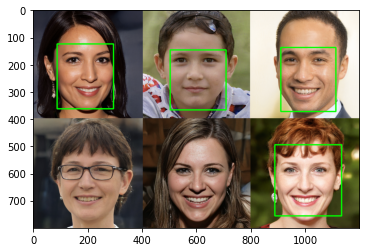

In [25]:
"%tensorflow_version 1.x"
import cv2

from faced import FaceDetector
from faced.utils import annotate_image

face_detector = FaceDetector()

img = cv2.imread(picture_path)
rgb_img = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)

thresh=0.5
# Receives RGB numpy image (HxWxC) and
# returns (x_center, y_center, width, height, prob) tuples. 
bboxes = face_detector.predict(rgb_img, thresh)

# Use this utils function to annotate the image.
ann_img = annotate_image(img, bboxes)

# Show the image
plt.imshow(cv.cvtColor(ann_img, cv.COLOR_BGR2RGB))